<a href="https://colab.research.google.com/github/SlavikHom/Learning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train[0][0]

6

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-33-71c04c129094>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


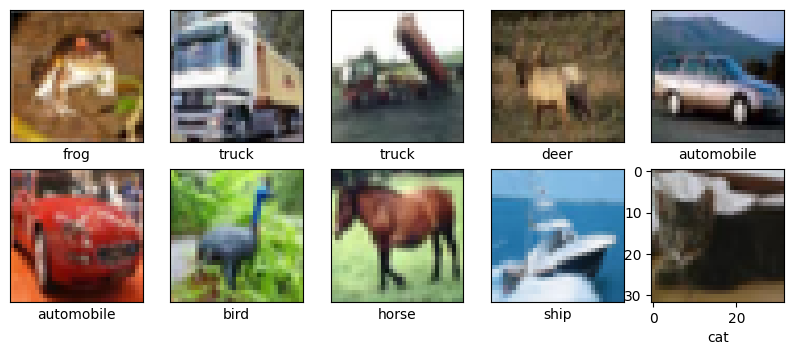

In [33]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [ ]:
X_train.max()

255

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(15))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5075 - accuracy: 0.4481 - val_loss: 1.1736 - val_accuracy: 0.5780
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0869 - accuracy: 0.6171 - val_loss: 1.0397 - val_accuracy: 0.6377
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9238 - accuracy: 0.6776 - val_loss: 0.9128 - val_accuracy: 0.6843
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8025 - accuracy: 0.7202 - val_loss: 0.8939 - val_accuracy: 0.6958
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7171 - accuracy: 0.7481 - val_loss: 0.8256 - val_accuracy: 0.7161
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6425 - accuracy: 0.7753 - val_loss: 0.8311 - val_accuracy: 0.7185
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5820 - accuracy: 0.7958 - val_loss: 0.8266 - val_accuracy

Text(0, 0.5, 'Accuracy')

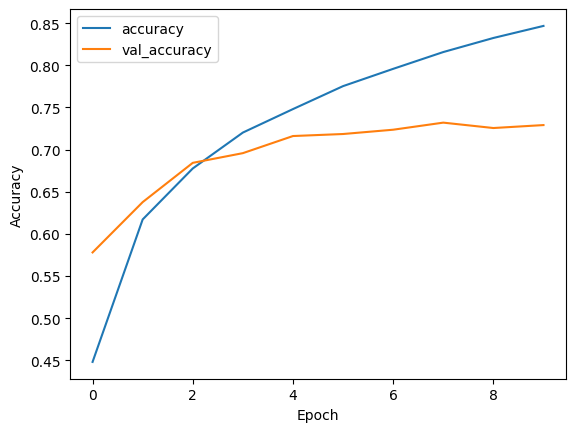

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Accuracy")

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_2.add(layers.Dropout(0.1))

model_2.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Conv2D(128,(3,3), padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Conv2D(256,(3,3), padding='same',activation='relu'))
model_2.add(layers.Dropout(0.2))

model_2.add(layers.Conv2D(256,(3,3),padding='same', activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(1024,activation='relu'))
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0         
                                                      

In [ ]:
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history2 = model_2.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 23s 12ms/step - loss: 1.6061 - accuracy: 0.4032 - val_loss: 1.2483 - val_accuracy: 0.5482
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1258 - accuracy: 0.5970 - val_loss: 0.9495 - val_accuracy: 0.6638
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9351 - accuracy: 0.6697 - val_loss: 0.8992 - val_accuracy: 0.6871
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8211 - accuracy: 0.7089 - val_loss: 0.7838 - val_accuracy: 0.7280
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7456 - accuracy: 0.7385 - val_loss: 0.7309 - val_accuracy: 0.7427
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6901 - accuracy: 0.7578 - val_loss: 0.7293 - val_accuracy: 0.7511
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6418 - accuracy: 0.7762 - val_loss: 0.7074 - val_accura

Text(0, 0.5, 'Accuracy')

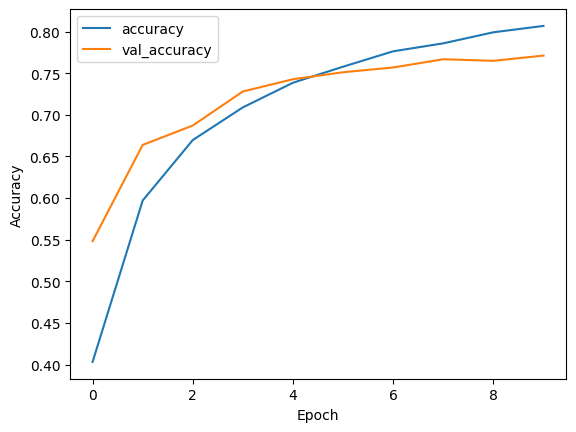

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Accuracy")

Text(0.5, 1.0, 'model_2')

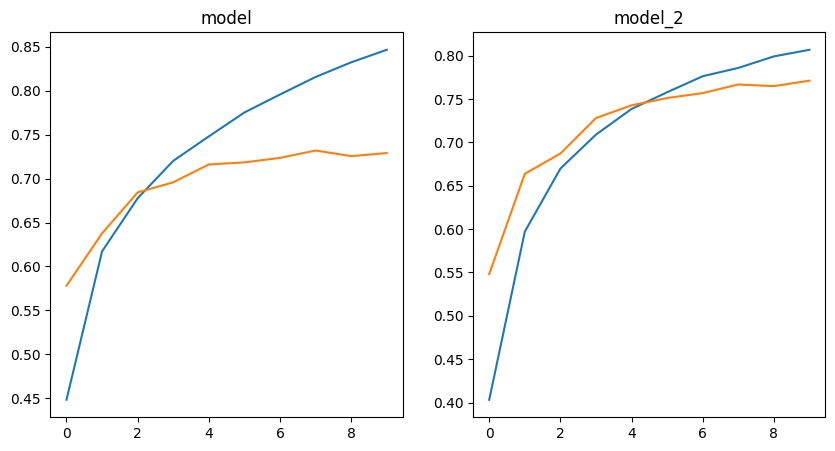

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'],label='val_accuracy')
ax1.set_title('model')
ax2.plot(history2.history['accuracy'], label='accuracy')
ax2.plot(history2.history['val_accuracy'],label='val_accuracy')
ax2.set_title('model_2')